# **Author:*Dhasaradh A M*  

# **Project Title**: Sentiment analysis for marketing

# **Problem Definition:**

The problem is to perform sentiment analysis on customer feedback to gain insights into competitor products. By understanding customer sentiments, companies can identify strengths and weaknesses in competing products, thereby improving their own offerings. This project requires utilizing various NLP methods to extract valuable insights from customer feedback.

# **Design Thinking:**

**Data Collection:** Identify a dataset containing customer reviews and sentiments about competitor products.

**Data Preprocessing:** Clean and preprocess the textual data for analysis.

**Sentiment Analysis Techniques:** Employ different NLP techniques like Bag of Words, Word Embeddings, or Transformer models for sentiment analysis.

**Feature Extraction:** Extract features and sentiments from the text data

**Visualization:** Create visualizations to depict the sentiment distribution and analyze trends.

**Insights Generation:** Extract meaningful insights from the sentiment analysis results to guide business decisions.

# **Dataset Link:**

 https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

# Dependence


In [ ]:
!pip install nltk scikit-learn pandas matplotlib

# Importing the Packages

We use panda and numpy to help us analyze the data, matplotlib, wordcloud and PIL for data visualization, and sklearn for classification model in machine learning.

This code snippet imports essential libraries, such as NLTK, Pandas, NumPy, Matplotlib,seaborn,wordcloud and scikit-learn, and downloads stopwords and tokenizer models from NLTK. It lays the groundwork for text classification tasks by setting up a pipeline that includes data preprocessing (stopwords removal and tokenization) and the use of the Multinomial Naive Bayes classifier. This code is often used for tasks like sentiment analysis or text classification, where text data is processed, features are extracted, and a classification model is trained and evaluated for accuracy and performance.

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns



In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Data Collection**

We need to load the Twitter  Airlines Sentiment CSV file into jupyter notebook.

In [5]:
data = pd.read_csv('Tweets.csv')

In [6]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# **Data Preprocessing**

 Then we can do data cleaning based on that.

This below provided code snippet utilizes the NLTK library to preprocess text data stored in a DataFrame called 'data.' It first initializes a set of English stopwords and then defines a custom function, 'preprocess_text,' which tokenizes, converts to lowercase, and removes non-alphanumeric characters from each text entry while filtering out stopwords. This function is applied to the 'text' column of the DataFrame, and the cleaned text is stored in a new 'cleaned_text' column, making the data more suitable for various natural language processing tasks, such as sentiment analysis or text classification.

In [8]:
stop_words = set(stopwords.words('english'))

In [9]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(words)

data['cleaned_text'] = data['text'].apply(preprocess_text)

In [10]:
data['cleaned_text'].head()

0                          virginamerica dhepburn said
1    virginamerica plus added commercials experienc...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: cleaned_text, dtype: object

# **Sentiment Analysis Techniques and Feature Extraction**

The provided code demonstrates a sentiment analysis task using the Bag of Words (BoW) approach and a Multinomial Naive Bayes classifier.

This code snippet conducts text classification for airline sentiment analysis. It starts by splitting the dataset into training and testing sets, with 80% used for training and 20% for testing. Text data is transformed into numerical features using the Bag of Words (BoW) approach with `CountVectorizer`. A Multinomial Naive Bayes classifier is trained on the training data and subsequently used to predict sentiment labels for the test data. The code calculates and prints the accuracy of the classifier, generates a confusion matrix to assess classification performance across sentiment categories, and provides a classification report with precision, recall, F1-score, and support metrics, offering a comprehensive evaluation of the sentiment analysis model's performance.

In [11]:
X = data['cleaned_text']
y = data['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [13]:
classifier = MultinomialNB()
classifier.fit(X_train_bow, y_train)

MultinomialNB()

In [14]:
y_pred = classifier.predict(X_test_bow)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.78
Confusion Matrix:
[[1610   58   17]
 [ 281  231   49]
 [ 154   46  256]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.96      0.86      1685
     neutral       0.69      0.41      0.52       561
    positive       0.80      0.56      0.66       456

    accuracy                           0.78      2702
   macro avg       0.76      0.64      0.68      2702
weighted avg       0.77      0.78      0.76      2702



# **Visualization**

The provided code snippet is visualizing the distribution of sentiments in a dataset using a bar chart. It appears to be written in Python and utilizes the Matplotlib library for data visualization.



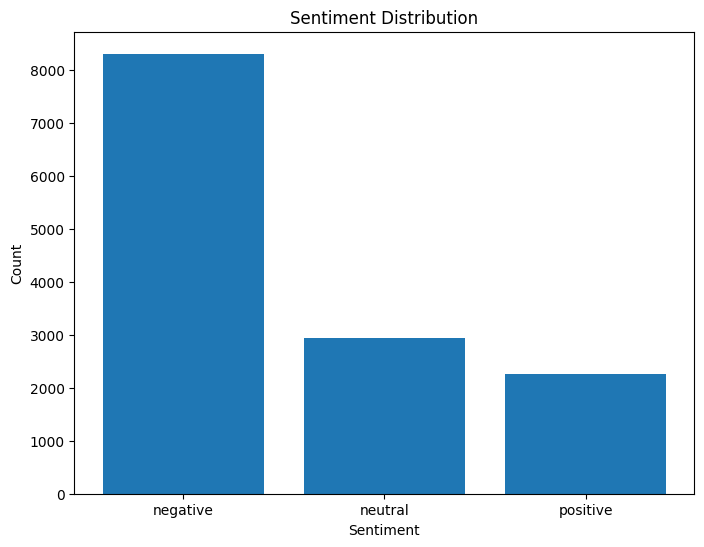

In [16]:
sentiment_counts = data['airline_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# **Insights Generation**

This code snippet analyzes the sentiment distribution and the most common words in positive and negative reviews from a dataset. Here's a concise overview:

The code first calculates and displays the distribution of sentiment labels in the 'airline_sentiment' column of the 'data' DataFrame. It counts the occurrences of each sentiment label ('positive,' 'negative,' etc.) and prints the results.

Next, it extracts the 'cleaned_text' from the DataFrame for both positive and negative reviews and combines them into lists of words. It then uses the `Counter` class from the 'collections' library to count the frequency of each word in both positive and negative reviews.

Finally, the code prints the top 10 most common words in both positive and negative reviews, providing insights into the most frequently occurring words associated with each sentiment category.

In [17]:

sentiment_counts = data['airline_sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

positive_reviews = data[data['airline_sentiment'] == 'positive']['cleaned_text']
negative_reviews = data[data['airline_sentiment'] == 'negative']['cleaned_text']

positive_words = ' '.join(positive_reviews).split()
negative_words = ' '.join(negative_reviews).split()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

print("\nTop 10 Words in Positive Reviews:")
print(positive_word_counts.most_common(10))

print("\nTop 10 Words in Negative Reviews:")
print(negative_word_counts.most_common(10))


Sentiment Distribution:
negative    8302
neutral     2947
positive    2260
Name: airline_sentiment, dtype: int64

Top 10 Words in Positive Reviews:
[('jetblue', 593), ('thanks', 576), ('southwestair', 576), ('united', 528), ('thank', 433), ('flight', 354), ('usairways', 274), ('americanair', 251), ('great', 227), ('http', 207)]

Top 10 Words in Negative Reviews:
[('united', 2889), ('flight', 2623), ('usairways', 2360), ('americanair', 1230), ('southwestair', 1208), ('jetblue', 1049), ('get', 842), ('cancelled', 775), ('service', 670), ('customer', 557)]


This below Python code utilizes libraries such as `pandas`, `matplotlib`, `WordCloud`, and `seaborn` to create visualizations for word frequency analysis in positive and negative reviews. It generates word clouds to visualize prominent words in both types of reviews and displays them side by side. Additionally, it identifies and displays the top N most common words in each category through bar plots, enhancing the understanding of the most frequent terms in positive and negative feedback. This code provides a concise and insightful analysis of textual data, aiding in sentiment analysis or review interpretation.

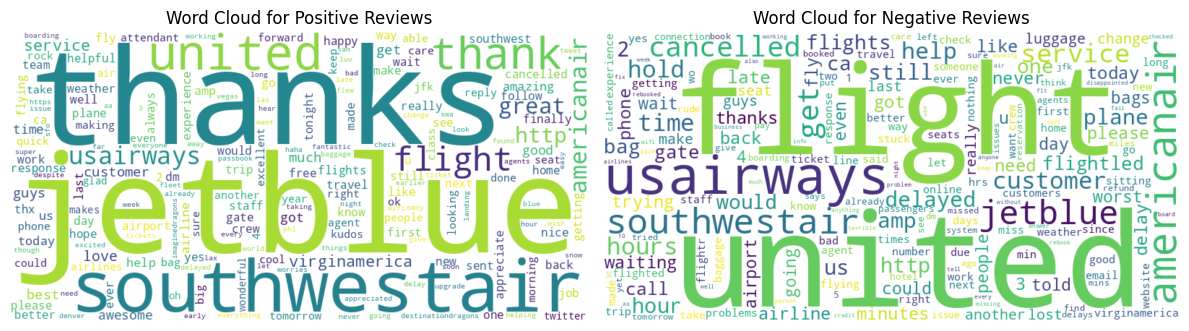

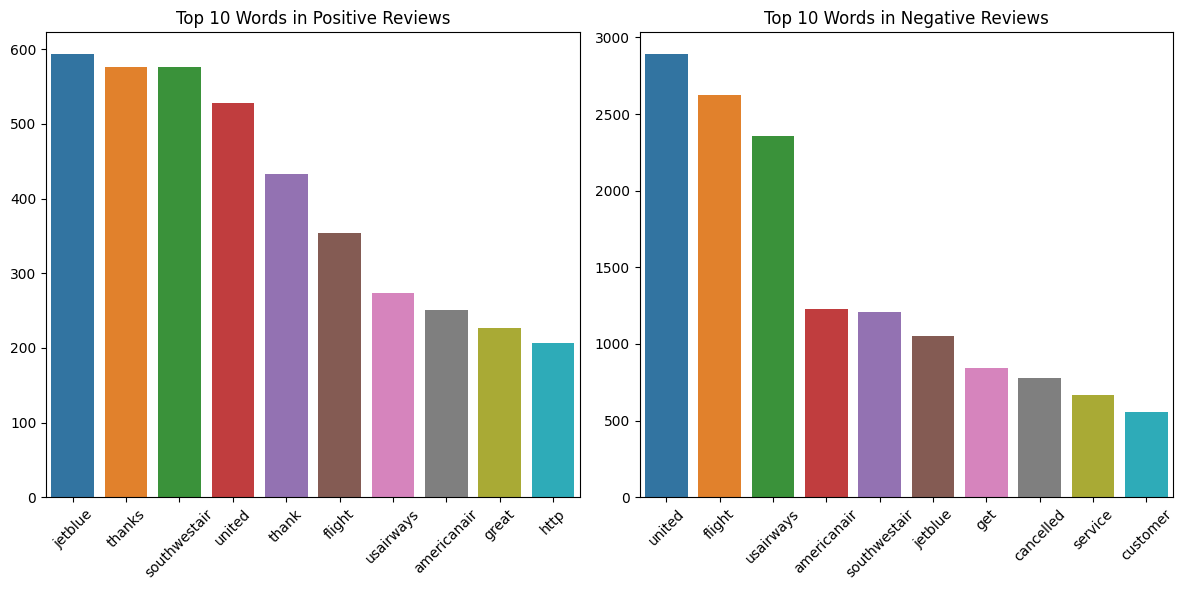

In [18]:

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_counts)


negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_counts)


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Positive Reviews")
plt.axis('off')

plt.subplot(122)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Negative Reviews")
plt.axis('off')

plt.tight_layout()
plt.show()

top_n = 10
top_positive_words = positive_word_counts.most_common(top_n)
top_negative_words = negative_word_counts.most_common(top_n)

plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.barplot(x=[word[0] for word in top_positive_words], y=[word[1] for word in top_positive_words])
plt.title("Top {} Words in Positive Reviews".format(top_n))
plt.xticks(rotation=45)

plt.subplot(122)
sns.barplot(x=[word[0] for word in top_negative_words], y=[word[1] for word in top_negative_words])
plt.title("Top {} Words in Negative Reviews".format(top_n))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
